**1. Importing the Dependencies**

In [142]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading and understanding**

In [143]:
df = pd.read_csv('autism-data.csv')

Initial Inspection

In [144]:
df.shape

(800, 22)

In [145]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [146]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [147]:
pd.set_option('display.max_columns', None)

In [148]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [149]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [151]:
df['age'] = df['age'].astype('int')

In [152]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [153]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    int64  
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

Dropped the ID column as it will not add any value to our trained model.

In [155]:
for col in df.columns:
    print(col)

ID
A1_Score
A2_Score
A3_Score
A4_Score
A5_Score
A6_Score
A7_Score
A8_Score
A9_Score
A10_Score
age
gender
ethnicity
jaundice
austim
contry_of_res
used_app_before
result
age_desc
relation
Class/ASD


In [156]:
for col in df.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(f'{col} : {df[col].unique()}')
        print('-'*50)

A1_Score : [1 0]
--------------------------------------------------
A2_Score : [0 1]
--------------------------------------------------
A3_Score : [1 0]
--------------------------------------------------
A4_Score : [0 1]
--------------------------------------------------
A5_Score : [1 0]
--------------------------------------------------
A6_Score : [0 1]
--------------------------------------------------
A7_Score : [1 0]
--------------------------------------------------
A8_Score : [0 1]
--------------------------------------------------
A9_Score : [1 0]
--------------------------------------------------
A10_Score : [1 0]
--------------------------------------------------
gender : ['f' 'm']
--------------------------------------------------
ethnicity : ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice : ['no' 'yes']
-------------------------------

Dropping the ID and the age_desc columns as they are irrelevant for model training

In [157]:
df.drop(columns = ['ID', 'age_desc'], inplace = True)

In [158]:
df.shape

(800, 20)

In [159]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [160]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [161]:
df.rename(columns = {'contry_of_res' : 'country_of_res'}, inplace = True)

In [162]:
df['country_of_res'].value_counts()

country_of_res
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
France                   10
Spain                    10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Bahamas                   6
Italy                     6
Malaysia                  6
Viet Nam                  5
Nicaragua                 4
Pakistan                  4
Armenia                   4
AmericanSamoa             4
Iraq                      4
Azerbaijan                4
Aruba                     4
Saudi Arabia              4
China                     4
Mexico                    4
Ukraine                   3
Niger

In [163]:
df['country_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [164]:
mapping = {
    "AmericanSamoa" : "United States",
    "Hong Kong" : "China",
    "Viet Nam" : "Vietnam",
}

In [165]:
df["country_of_res"] = df["country_of_res"].replace(mapping)

In [166]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [167]:
df["country_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [168]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**Insights from the data analysis**
1. There are missing values in ethnicity and relation.
2. age_desc column has only 1 unique value so it is removed as it is irrelevant for prediction.
3.  fixed the country names.
4. Identified class imbalance in the target column.

**3. Exploratory Data Analysis (EDA)**

In [169]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [170]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:
- age
- result

Distrubution Plots

Mean : 27.96375
Median : 24.0


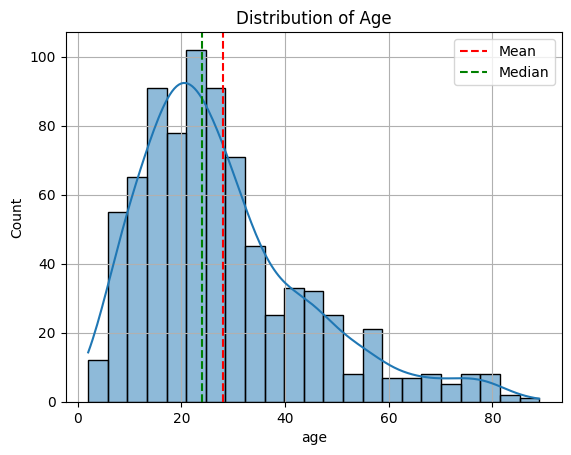

In [171]:
# Age Column

sns.histplot(df['age'], kde = True)
plt.title('Distribution of Age')

age_mean = df['age'].mean()
age_median = df['age'].median()

print(f'Mean : {age_mean}')
print(f'Median : {age_median}')

plt.axvline(age_mean, color = 'red', linestyle = "--", label = 'Mean')
plt.axvline(age_median, color = 'green', linestyle = "--", label = 'Median')
plt.legend()
plt.grid()
plt.show()

Mean : 8.537303106501248
Median : 9.605299308


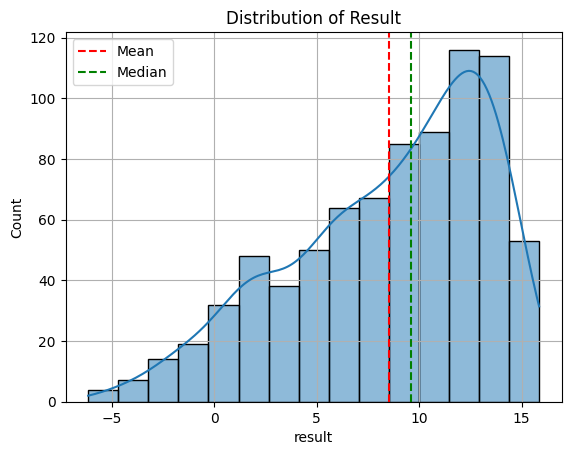

In [172]:
# Result Column

sns.histplot(df['result'], kde = True)
plt.title('Distribution of Result')

result_mean = df['result'].mean()
result_median = df['result'].median()

print(f'Mean : {result_mean}')
print(f'Median : {result_median}')

plt.axvline(result_mean, color = 'red', linestyle = "--", label = 'Mean')
plt.axvline(result_median, color = 'green', linestyle = "--", label = 'Median')
plt.legend()
plt.grid()
plt.show()

Box Plots for identifying outliers in the Numerical Columns

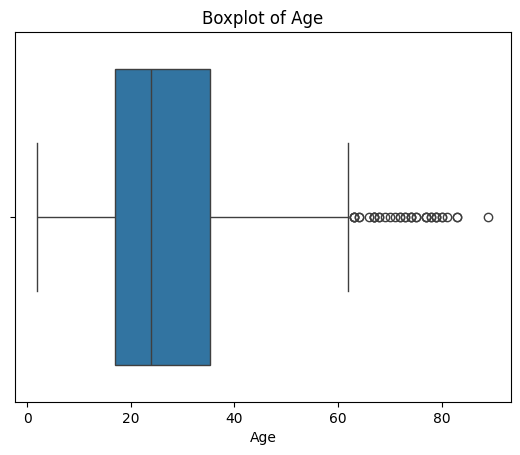

In [173]:
sns.boxplot(x = df['age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

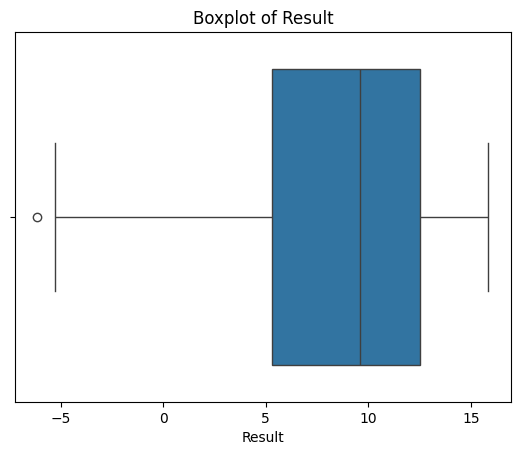

In [174]:
sns.boxplot(x = df['result'])
plt.title('Boxplot of Result')
plt.xlabel('Result')
plt.show()

Now, we can count the outliers using the IQR method

In [175]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

age_outliers = df[(df['age'] < lower_limit) | (df['age'] > upper_limit)]

In [176]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [177]:
age_outliers.shape

(39, 20)

In [178]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

result_outliers = df[(df['result'] < lower_limit) | (df['result'] > upper_limit)]

In [179]:
result_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
698,0,0,0,0,0,0,0,0,0,0,62,f,Asian,no,no,Jordan,no,-6.137748,Self,0


In [180]:
result_outliers.shape

(1, 20)

**Univariate Analysis of Categorical Columns**

In [181]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [182]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before', 'relation']

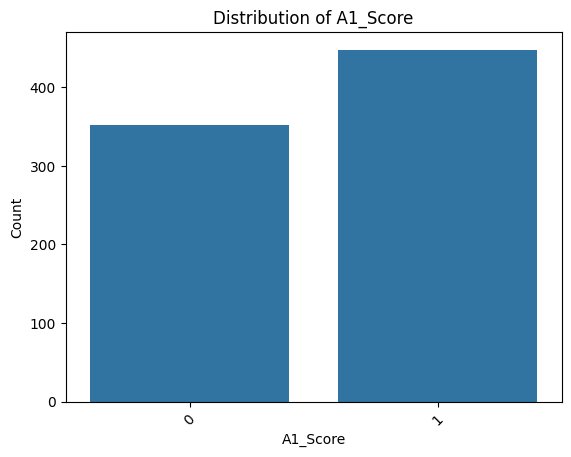

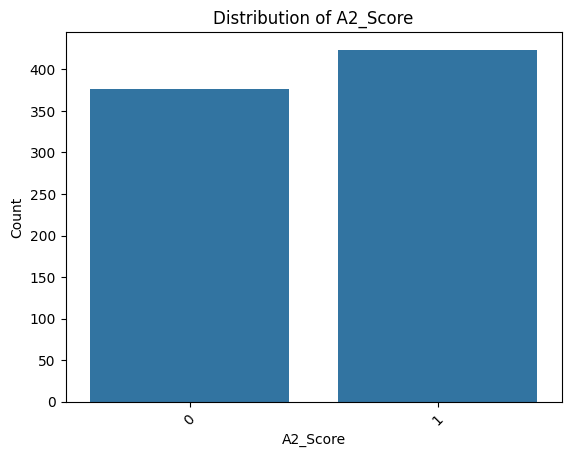

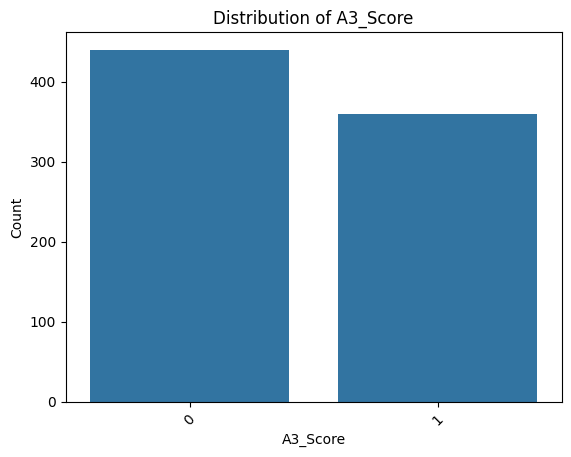

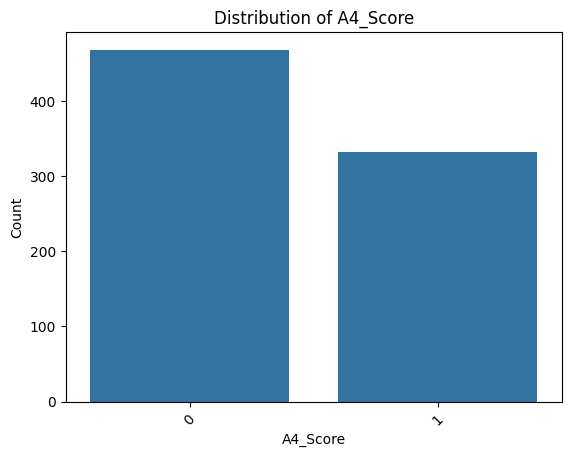

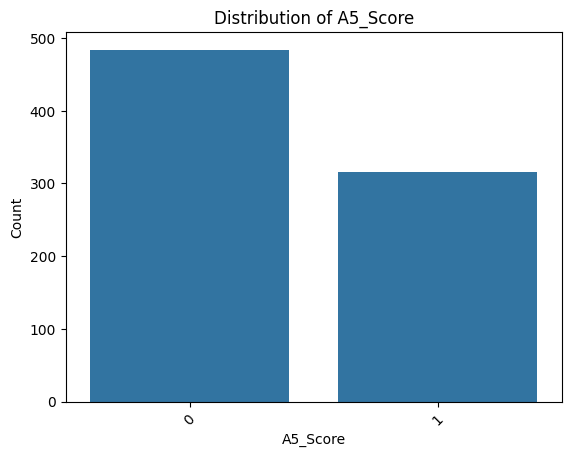

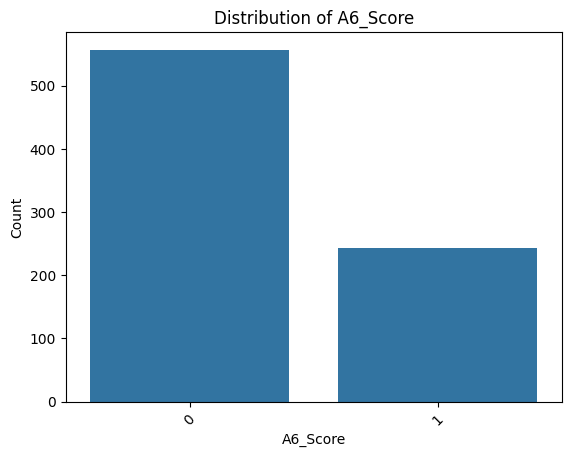

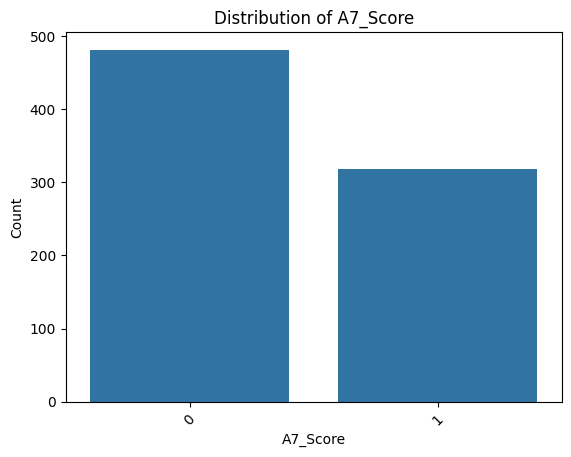

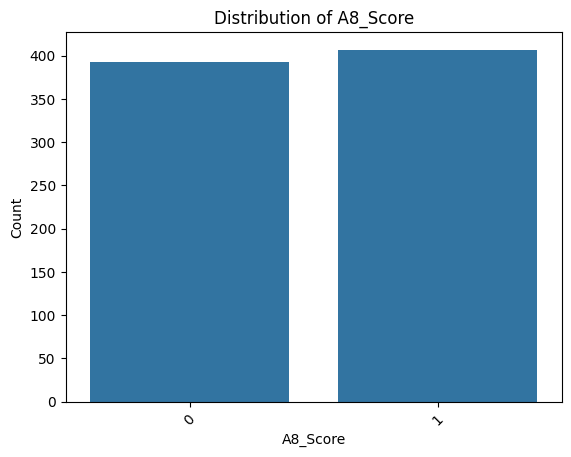

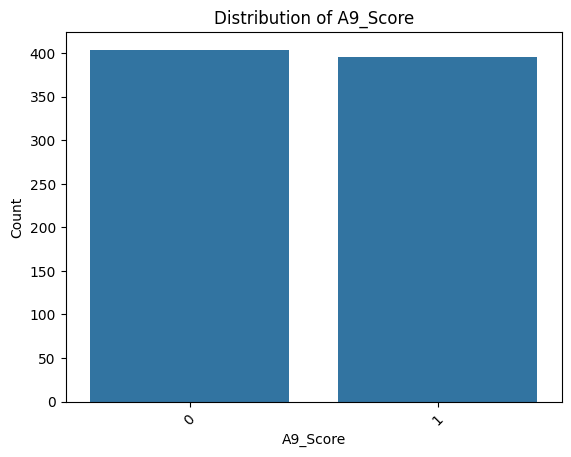

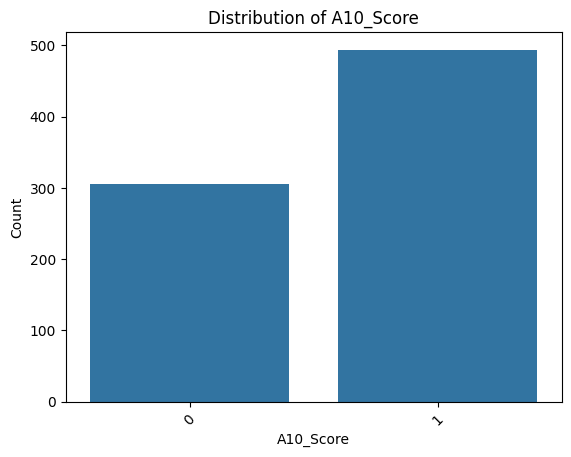

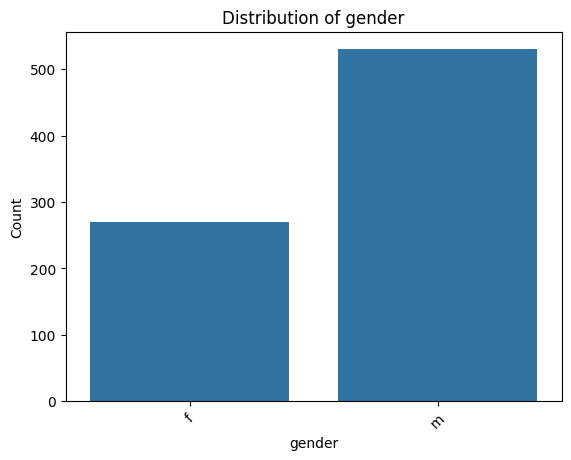

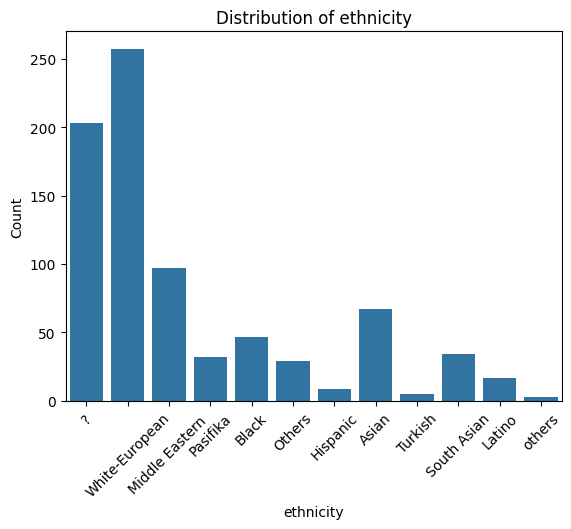

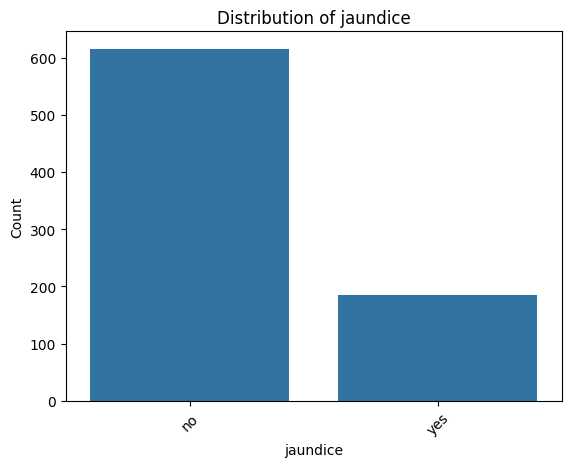

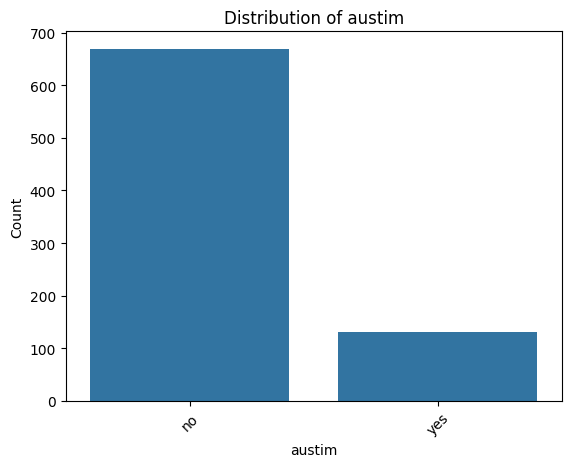

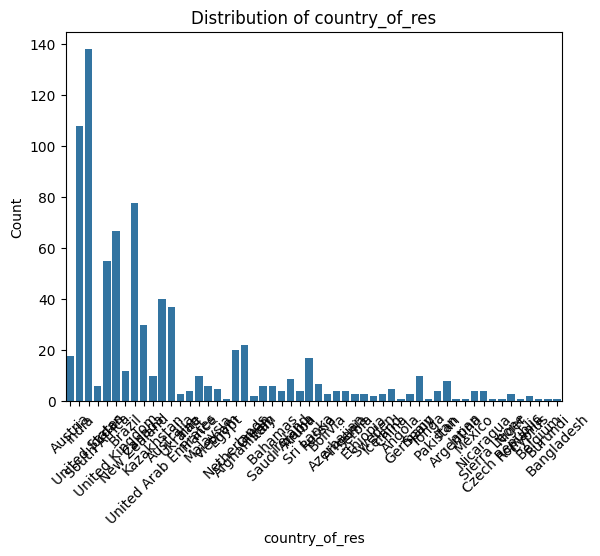

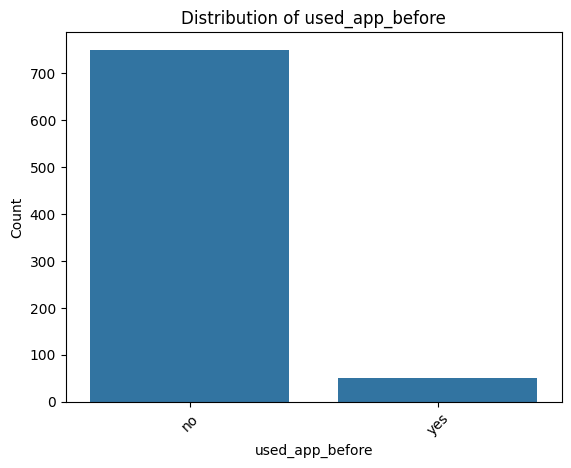

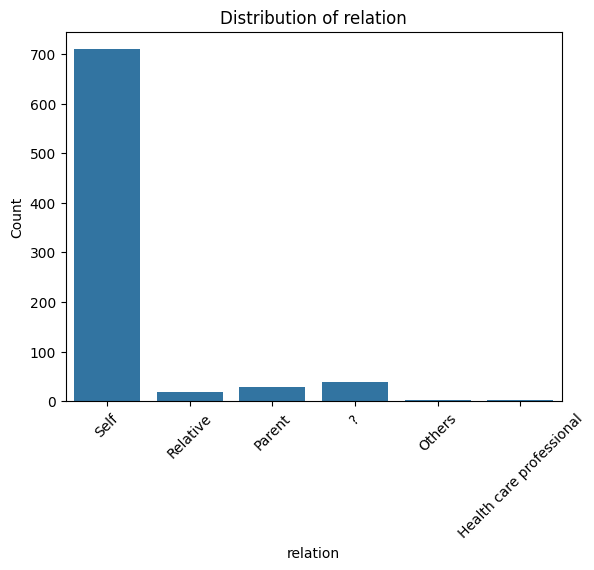

In [183]:
for col in categorical_columns:
    sns.countplot(x = df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    plt.show()

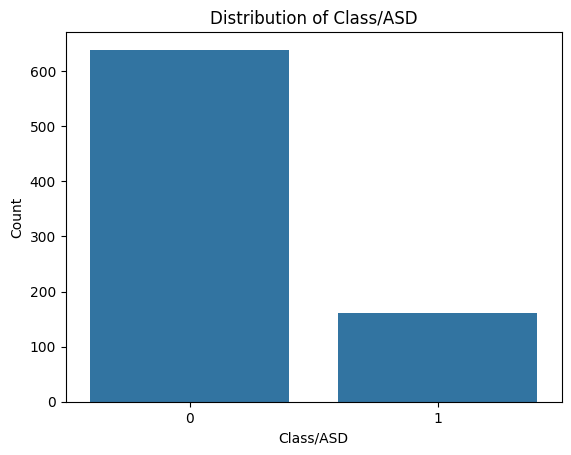

In [184]:
sns.countplot(x = df['Class/ASD'])
plt.title('Distribution of Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

In [185]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [186]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

We need to handle the missing values in the ethinicity column

In [187]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"}) 

In [188]:
df["relation"].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [189]:
df["relation"] = df["relation"].replace({
    "?": "Others", 
    "Health care professional": "Others",
    "Relative": "Others",
    "Parent": "Others",
    })

In [190]:
df["relation"].value_counts()

relation
Self      709
Others     91
Name: count, dtype: int64

In [191]:
df["ethnicity"].value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

**Label Encoding**

In [192]:
object_columns = df.select_dtypes(include = 'object').columns

In [193]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'country_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [194]:
encoders = {}

for col in object_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


In [195]:
with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)
    

In [196]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'country_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

**Bivariate Analysis**

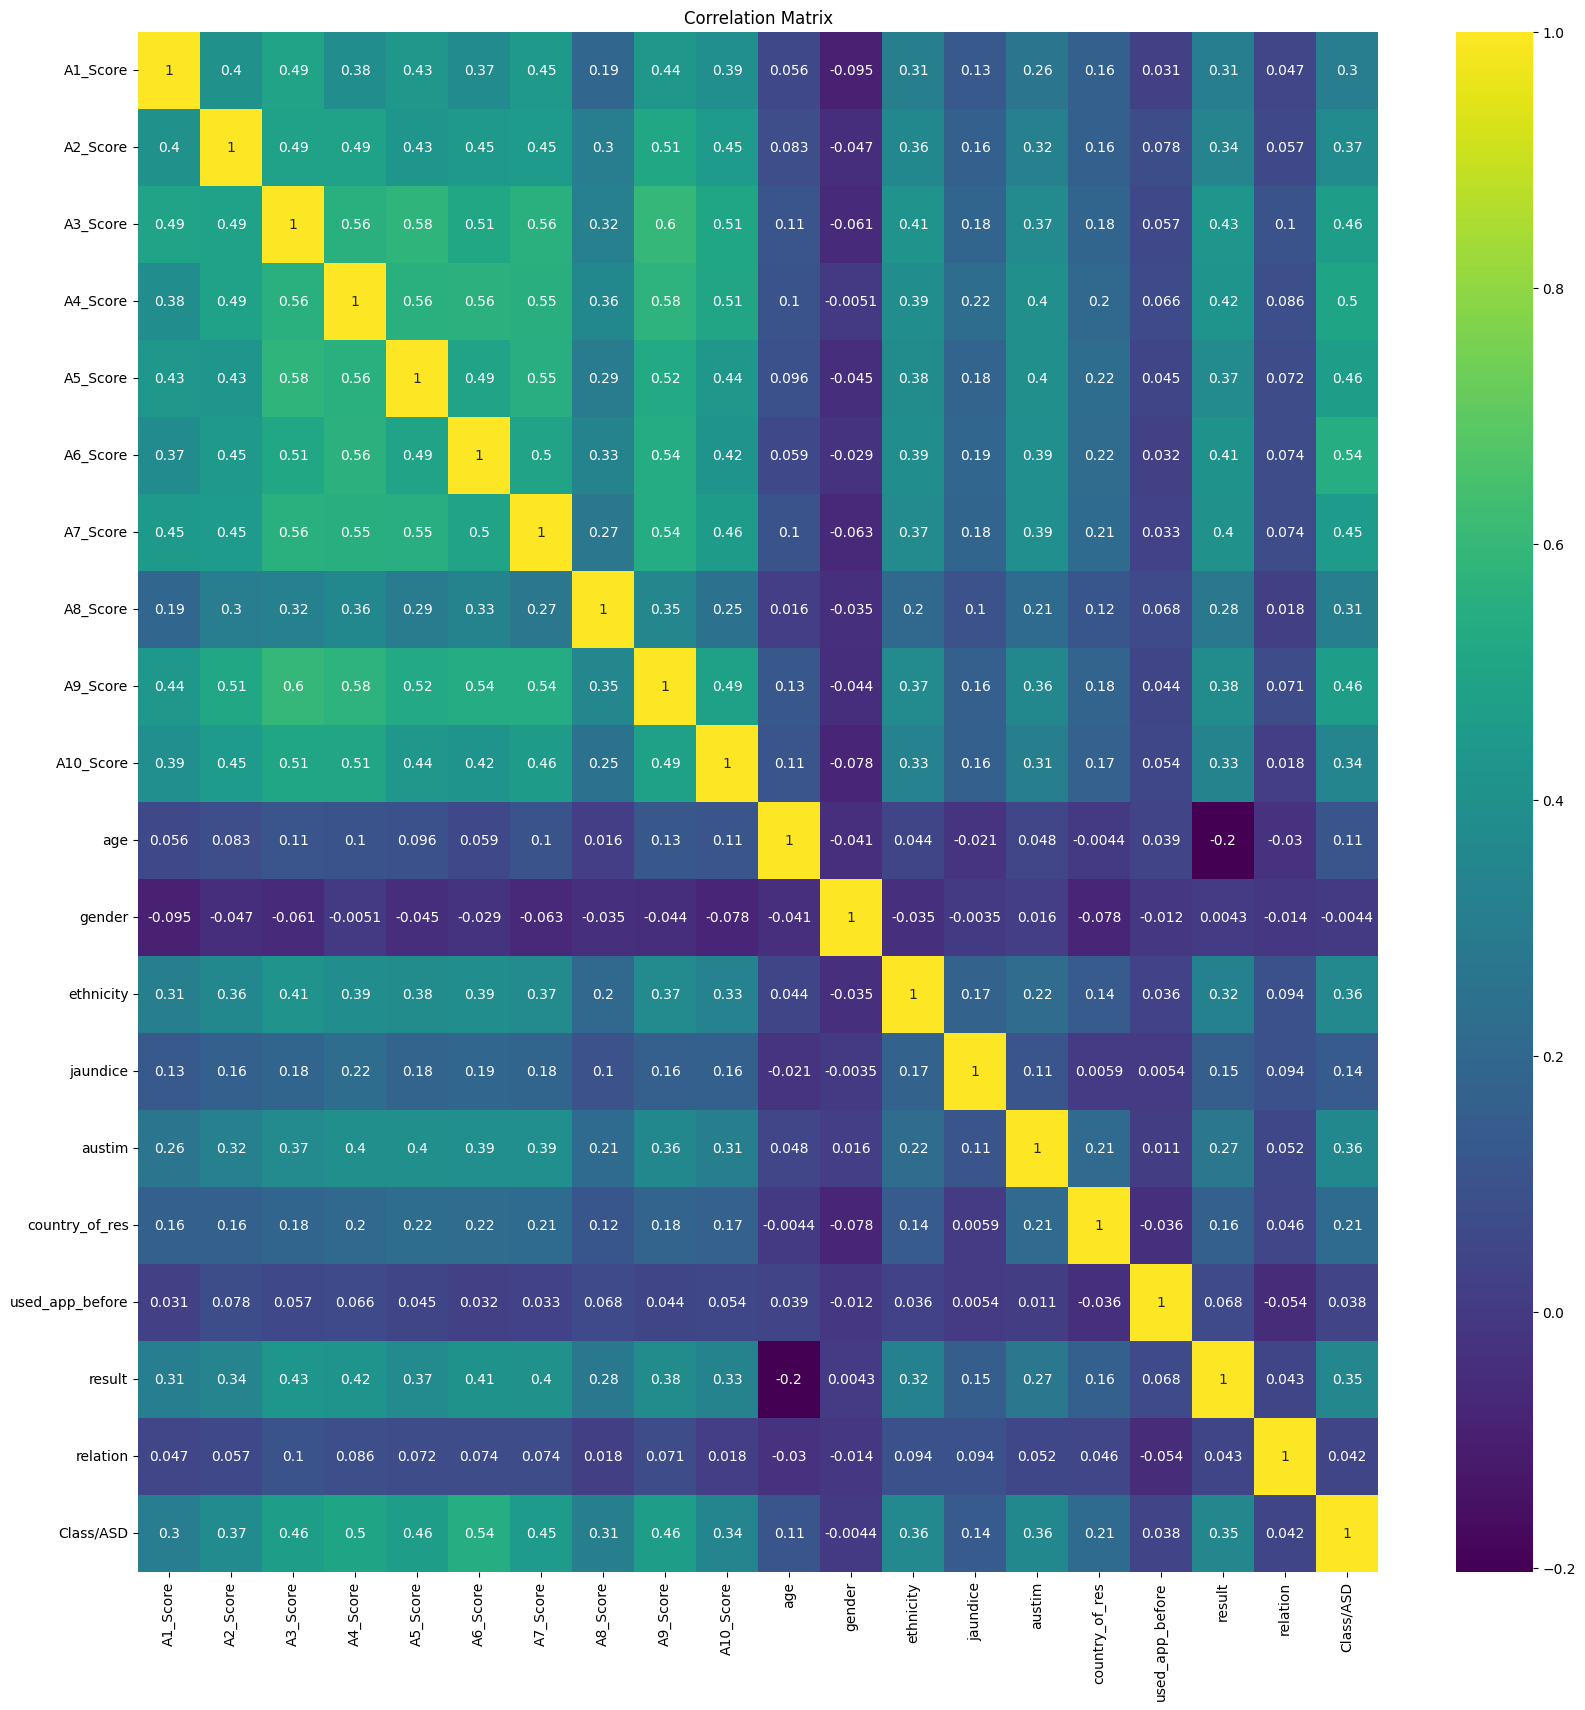

In [197]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.title('Correlation Matrix')
plt.show()

**Insights from EDA**
1. There are a few outliers in the numerical columns(age, results).
2. There is a class imbalance in the target column.
3. There is a class imbalance in the categorical features.
4. We don't have any highly correlated column.
5. Performed label encoding and save the encoders.


**4. Data Preprocessing**

Handling the outliers

In [198]:
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    median = df[column].median()

    df[column] = df[column].apply(lambda x: median if x < lower_limit or x > upper_limit else x)
    return df

In [199]:
df = replace_outliers(df, 'age')
df = replace_outliers(df, 'result')

In [200]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [201]:
df.shape

(800, 20)

**Train Test Split**

In [202]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [203]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,25.581250,0.662500,5.577500,0.231250,0.16375,32.558750,0.062500,8.556982,0.886250,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,12.697142,0.473153,2.902503,0.421896,0.37028,16.300189,0.242213,4.779671,0.317706,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-5.264833,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,4.000000,0.000000,0.00000,23.000000,0.000000,5.311872,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,1.000000,5.000000,0.000000,0.00000,33.000000,0.000000,9.608894,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,1.000000,9.000000,0.000000,0.00000,51.000000,0.000000,12.514484,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.000000,1.000000,9.000000,1.000000,1.00000,53.000000,1.000000,15.853126,1.000000,1.000000


In [204]:
X = df.drop(columns = ["Class/ASD"])
Y = df["Class/ASD"]

In [205]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [206]:
print(Y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [207]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 19)

In [208]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(640, 19)
(640,)
(160, 19)
(160,)


In [209]:
Y_train.value_counts()

Class/ASD
0    507
1    133
Name: count, dtype: int64

**SMOTE (Synhtetic Minority Oversampling TEchnique)**

In [210]:
smote = SMOTE(random_state = 19)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [211]:
X_train_smote.shape, Y_train_smote.shape

((1014, 19), (1014,))

In [212]:
Y_train_smote.value_counts()

Class/ASD
0    507
1    507
Name: count, dtype: int64

**5. Model Training**

In [216]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=19),
    "Random Forest": RandomForestClassifier(random_state=19),
    "XGBoost": XGBClassifier(random_state=19),
}

In [223]:
cv_scores = {}

for model_name, model in models.items():
    print(f'Training {model_name} with default parameters')
    scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f'{model_name} - Mean Cross Validation Accuracy : {np.mean(scores)}')
    print('-'*50)

Training Decision Tree with default parameters
Decision Tree - Mean Cross Validation Accuracy : 0.8797005316295177
--------------------------------------------------
Training Random Forest with default parameters
Random Forest - Mean Cross Validation Accuracy : 0.919128907964688
--------------------------------------------------
Training XGBoost with default parameters
XGBoost - Mean Cross Validation Accuracy : 0.9112227478905526
--------------------------------------------------


In [224]:
cv_scores

{'Decision Tree': array([0.83743842, 0.86699507, 0.89655172, 0.90147783, 0.8960396 ]),
 'Random Forest': array([0.93103448, 0.92118227, 0.91625616, 0.91133005, 0.91584158]),
 'XGBoost': array([0.91133005, 0.90640394, 0.91133005, 0.93596059, 0.89108911])}

**6. Model Selection and Hyper-parameter Tuning**

In [225]:
decision_tree = DecisionTreeClassifier(random_state = 19)
random_forest = RandomForestClassifier(random_state = 19)
xgboost_classifier = XGBClassifier(random_state = 19)

We will now have the hyperparameter grids for RandomizedSearchCV

In [226]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1],
}

In [ ]:
random_search_dt = RandomizedSearchCV(decision_tree, param_distributions = param_grid_dt, n_iter = 20, scoring = 'accuracy', cv = 5, random_state = 19)
random_search_rf = RandomizedSearchCV(random_forest, param_distributions = param_grid_rf, n_iter = 20, scoring = 'accuracy', cv = 5, random_state = 19)
random_search_xgb = RandomizedSearchCV(xgboost_classifier, param_distributions = param_grid_xgb, n_iter = 20, scoring = 'accuracy', cv = 5, random_state = 19)

In [228]:
random_search_dt.fit(X_train_smote, Y_train_smote)
random_search_rf.fit(X_train_smote, Y_train_smote)
random_search_xgb.fit(X_train_smote, Y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=19, ...),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=19, scoring='accuracy')

In [233]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=19)
0.8688240745256792
RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=200, random_state=19)
0.9280007803736039
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,

In [229]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_score = random_search_dt.best_score_
    best_model = random_search_dt
if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf
if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb

In [230]:
print(f'Best Model : {best_model.best_estimator_}')
print(f'Best Score : {best_score}')

Best Model : RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=200, random_state=19)
Best Score : 0.9280007803736039


In [240]:
model_data = {"model": best_model, "feature_names": X.columns.to_list()}

with open('autism_prediction_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

**Evaluation**

In [235]:
Y_test_pred = best_model.predict(X_test)

print(f'Accuracy : {accuracy_score(Y_test, Y_test_pred)}')
print(f'Confusion Matrix : \n{confusion_matrix(Y_test, Y_test_pred)}')
print(f'Classification Report : \n{classification_report(Y_test, Y_test_pred)}')

Accuracy : 0.83125
Confusion Matrix : 
[[113  19]
 [  8  20]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       132
           1       0.51      0.71      0.60        28

    accuracy                           0.83       160
   macro avg       0.72      0.79      0.75       160
weighted avg       0.86      0.83      0.84       160



**7. Building a Predictive System**

In [241]:
with open('autism_prediction_model.pkl', 'rb') as file:
    model_data = pickle.load(file)

In [242]:
loaded_model = model_data["model"]
feature_names = model_data["feature_names"]

In [243]:
loaded_model

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=19),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=19, scoring='accuracy')

In [244]:
feature_names

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'ethnicity',
 'jaundice',
 'austim',
 'country_of_res',
 'used_app_before',
 'result',
 'relation']

In [267]:
input_data = {
    "A1_Score": 1,
    "A2_Score": 1,
    "A3_Score": 0,
    "A4_Score": 1,
    "A5_Score": 0,
    "A6_Score": 1,
    "A7_Score": 0,
    "A8_Score": 1,
    "A9_Score": 0,
    "A10_Score": 1,
    "age": 40,
    "gender": "f",
    "ethnicity": "White-European",
    "jaundice": "no",
    "austim": "no",
    "country_of_res": "United States",
    "used_app_before": "no",
    "result": 7,
    "relation": "Self",
}

In [268]:
input_df = pd.DataFrame([input_data])

In [269]:
input_df    

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation
0,1,1,0,1,0,1,0,1,0,1,40,f,White-European,no,no,United States,no,7,Self


In [270]:
with open('encoders.pkl', 'rb') as file:
    encoders = pickle.load(file)

In [271]:
for column, encoder in encoders.items():
    input_df[column] = encoder.transform(input_df[column])

In [272]:
input_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,country_of_res,used_app_before,result,relation
0,1,1,0,1,0,1,0,1,0,1,40,0,9,0,0,52,0,7,1


In [273]:
prediction = loaded_model.predict(input_df[feature_names])

In [276]:
print(f'Prediction : {"Yes" if prediction[0] == 1 else "No"}')

Prediction : No
